# DS2500 Final Project:  FIFA 23 Player Recommendations
## Team Index: 44

- Patrick Hoyle (hoyle.p@northeastern.edu)
- Samuel Bannett (bannett.s@northeastern.edu)
- Akshat Mittal (mittal.a@northeastern.edu) 
- Xi Chen (chen.xi@northeastern.edu) 


# Executive Summary

Based on the user preferences for attributes or similar players, we generate a graph that shows the top 5 players (as shown in Figures 1 and 2 in RESULTS) the user can choose from. After the user chooses one of those players, we get data of the user’s historical prices from the Futbin using web scrapping and then using polynomial regression to predict the player’s prices (as shown in Figures 6 and 7 in RESULTS). We had to interfere with the data because the regression model was not accurate enough. 

# Introduction
FIFA 23 is an association soccer video game developed and released annually by Electronic Arts. FIFA Ultimate Team is a mode in FIFA that lets you build your dream squad. You can earn coins by playing matches, and completing objectives There is a transfer market where you can buy and sell players and the price depends on demand and supply. It can be very confusing and difficult for gamers to identify players that would best fit their team. This could be due to being unfamiliar with the attributes of the players or having difficulty finding players similar to their favorite player. After solving this problem, the users often have problems identifying when is the right time to buy/sell players so they can maximize profits and minimize expenses. 

We will be using nearest neighbors to recommend the top 5 players for the attributes the user is looking for or the ones which are most similar to the user’s favorite player. After the user identifies the player they want, we will be web scrapping to get the past prices of the player and run a regression model to predict the player’s prices. 



# Data Description
This project will obtain a data set from [Kaggle](https://www.kaggle.com/datasets/sanjeetsinghnaik/fifa-23-players-dataset) The data contains all the players stored in the game. Each player has different traits and attributes that connect directly to their real-life skills. The only modifications that we had to do to our data were to delete players with an overall rating below 75, as they are rarely used in the game and skewed our statistics, and delete the following columns which were not relevant to us: Known As, Potential, Image Link, Wage (in Euros), Release Clause, Contract Until, Joined On, On Loan, National Team Image Link, National Team Position, National Jersey Number, Position Rating. Other than that, the data came clean. We then created data frames per position group to understand each type of position and its attributes.
![as](https://i.ibb.co/w0T27s9/Screenshot-2022-12-06-at-10-58-15-PM.png)

We plot the average of each of the 6 attributes (Pace, Shooting, Passing, Dribbling, Defending, Physicality) for each position group to understand what attributes are most important to their ratings. After that, we plot a graph that compares the player's price with their overall rating. 
![.](https://i.ibb.co/Ms0Khg7/Screenshot-2022-12-06-at-11-06-25-PM.png)

The following graph shows us that price varies among players of the same overall rating. This is interesting to us for two reasons: since the overall ratings are the same, but the price is different, understand what specific individual attributes are driving the differences in prices; also, it's interesting to us because we see that users may buy more expensive players, without knowing that cheaper ones for with the same rating existed, thus we could help with that. To understand this problem, we run feature importance to understand which attribute is the main reason for the price differences of players with the same ratings. The graph below shows us that dribbling appears to be the most important feature to determine their price.

![.](https://i.ibb.co/C0BQk8R/Screenshot-2022-12-06-at-11-06-32-PM.png)

In [ ]:
import pandas as pd
import numpy as np

df_fifa = pd.read_csv('Fifa23_cleaned.csv')
df_fifa.head()

,Full Name,Overall,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,...,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,GK Rating
0,Lionel Messi,91,54000000,RW,CAM,Argentina,35,169,67,2190,...,96,20,35,24,6,11,15,14,8,22
1,Karim Benzema,91,64000000,"CF,ST",CF,France,34,185,81,2147,...,90,43,24,18,13,11,5,5,7,21
2,Robert Lewandowski,91,84000000,ST,ST,Poland,33,185,81,2205,...,88,35,42,19,15,6,12,8,10,22
3,Kevin De Bruyne,91,107500000,"CM,CAM",CM,Belgium,31,181,70,2303,...,89,68,65,53,15,13,5,10,13,24
4,Kylian Mbappé,91,190500000,"ST,LW",ST,France,23,182,73,2177,...,88,26,34,32,13,5,7,11,6,21


# Method

For our price predictions, we choose regression as the algorithm we are going to use. In our final project, we will attempt to produce an appropriate estimate of the future price of a specific card. In relation to our data, we don’t need classification to predict players’ names by their attributes (e.g. speed, shooting, height, etc.) as the attributes are mostly normalized our of 100. Furthermore, we scale normalized the data frame in the weak foot and skill moves columns to a total of 100 (the same as all of the other attributes) from a total of 5. The data were then scaled and denormalized to place greater importance on the attributes that the user finds more attractive, by multiplying them by the predetermined weights of each ranking. The most important value would be multiplied by 0.6, the second by 0.5, the third by 0.4, the fourth by 0.3, the fifth by 0.2, and the least important by  0.1. This would provide a more accurate prediction when it comes to the player’s attributes as we would use the most important attributes mentioned by the user. We then recommended and graphs the players by averaging all of their total attributes and getting the top 5. There is already a clear grouping in FIFA23, such as position (goalkeeper, defender, midfield, forward) and rare (bronze, silver, gold, special) so there’s no need to repeat. 

We also added a new column called “acceleRATE”, a new feature added in this game which categorize the style of running of each player, Controlled, Lengthy and Explosive running types. These players are categorized with a set of parameters in the code. 

In addition, as mentioned previously, we recommended players by two different ways, by attributes and by similar players. We recommended players by attributes, by placing filtering the dataframe by a set of parameters that the user inputs which are: attribute importance, position, type of acceleRATE, weak foot rating and skill moves rating. On the other side, we recommended players based on similar players. We did this first by asking the user to input a number of players they liked. With these players, we took the six key attributes and averaged them across to create one mean attribute for each. We then used these averaged attributes and the KDTree code from SkLearn to find the nearest neighbors to them. From these nearest neighbors, we then filtered out the players that were inputted, as those were always the nearest neighbors. After that, we also filtered out any nearest neighbors that were not in the same position groups as those that were inputted (i.e., if 2 midfielders were inputted, we made sure that our recommendations were also all midfielders). 

In terms of the types of regression, we started with linear regression but after looking at the graphs, we saw that the prices fluctuated a lot at the start (just after the release of the game) and it would make more sense if we were using polynomial regression to predict the prices. We predicted the prices of the players by fitting a line of best fit to the polynomial. We found the degree that was the simplest yet the most appropriate which is 2.


In [ ]:
# create a list of our conditions
conditions = [
    (df_fifa['Agility'] >= 65)&
    ((df_fifa['Agility'] - df_fifa['Strength']) >= 15)&
    (df_fifa['Acceleration'] >= 74)&
    (df_fifa['Height(in cm)'] <= 180), 
    (df_fifa['Strength'] >= 65)& ((df_fifa['Strength'] - df_fifa['Agility']) >= 14) & 
    (df_fifa['Acceleration'] >= 55) & (df_fifa['Height(in cm)'] >= 174)
    ]

# create a list of the values we want to assign for each condition
values = ['Explosive', 'Lengthy']

# create a new column and use np.select to assign values to it using our lists as arguments
df_fifa['acceleRATE'] = np.select(conditions, values)


col = df_fifa['acceleRATE']
col.replace(to_replace = '0', value ='Controlled', inplace=True)


In [ ]:
forwards_pos = ['ST', 'LW', 'RW', 'RF','LF', 'CF']
midfielders_pos = ['LM', 'RM', 'CAM', 'CM', 'CDM']
defenders_pos = ['LWB','LB', 'RB', 'CB']
goalkeeper_pos = ['GK']
all_positions = str(forwards_pos + midfielders_pos + defenders_pos + goalkeeper_pos)


In [ ]:
df_fifa['Category'] = ''

for i in range(len(df_fifa)):
    if df_fifa['Best Position'][i] in forwards_pos:
        df_fifa['Category'][i] = 'Forward'
    elif df_fifa['Best Position'][i] in midfielders_pos:
        df_fifa['Category'][i] = 'Midfielder'
    elif df_fifa['Best Position'][i] in defenders_pos:
        df_fifa['Category'][i] = 'Defender'
    else:
        df_fifa['Category'][i] = 'Goalkeeper'

<ipython-input-9-38a0b8e10990>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fifa['Category'][i] = 'Midfielder'
<ipython-input-9-38a0b8e10990>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fifa['Category'][i] = 'Forward'
<ipython-input-9-38a0b8e10990>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fifa['Category'][i] = 'Goalkeeper'
<ipython-input-9-38a0b8e10990>:9: SettingWithCopyWarning: 
A value is trying to be set 

In [ ]:
#user inputs
player_or_attribute  = int(input("Would you like a recommendation based on players you like or attributes? \n 1 for players, 2 for attributes \n"))
while player_or_attribute not in (1,2):
    print("Please input a valid response")
    player_or_attribute  = int(input("Would you like a recommendation based on players you like or attributes? \n 1 for players, 2 for attributes \n"))

user_trait = input("Please rank the attributes in order of importance separated by a comma with no spaces. \nOptions are: Pace, Dribbling, Passing, Shooting, Defending and Physicality \n")
user_trait = user_trait.split(',')   

if player_or_attribute == 2: 
    user_position = input("What position are you looking for?  \n")  
    while user_position not in all_positions:
        print("Please input a valid response")
        user_position = input("What position are you looking for?  \n")
        
    user_acceleration = input("What type of acceleration would you like for the player? \n \nOptions are: \n Controlled - most players in FIFA 23 will fall into the Controlled type as they accelerate uniformly in a controlled \n  manner.\n Explosive - these are shorter and more agile players who are able to quickly cover short distances and get ahead of \n  their opponents, even if that means slowing down after the initial burst of acceleration. These players are quicker\n  to start but their acceleration rate slows down. \n Lengthy - taller and stronger, these players need a bit more time to get going, but are able to catch up to anyone\n  and even surpass them, provided they have enough distance.\n")
    while user_acceleration not in ['Lengthy', 'Controlled', 'Explosive']:
        print("Please input a valid response")
        user_acceleration = input("What type of acceleration would you like for the player? \n \nOptions are: \n Controlled - most players in FIFA 23 will fall into the Controlled type as they accelerate uniformly in a controlled \n  manner.\n Explosive - these are shorter and more agile players who are able to quickly cover short distances and get ahead of \n  their opponents, even if that means slowing down after the initial burst of acceleration. These players are quicker\n  to start but their acceleration rate slows down. \n Lengthy - taller and stronger, these players need a bit more time to get going, but are able to catch up to anyone\n  and even surpass them, provided they have enough distance.\n")
    
    if user_position != defenders_pos:
        skills = input("How many stars for skill moves would you like? \nPlease place the answer as min,max\n")
        skills = skills.split(',') 
        weakfoot = input("How many stars for weak foot would you like? \nPlease place the answer as min,max\n")
        weakfoot = weakfoot.split(',') 

elif player_or_attribute == 1:
    user_players = input('Please input the full name of your favorite players separated by a comma and no spaces. \n')
    user_players = user_players.split(',')
    user_players = [i.title() for i in user_players]
    

Would you like a recommendation based on players you like or attributes? 
 1 for players, 2 for attributes 
2
Please rank the attributes in order of importance separated by a comma with no spaces. 
Options are: Pace, Dribbling, Passing, Shooting, Defending and Physicality 
Pace,Dribbling,Shooting,Physicality,Passing,Defending
What position are you looking for?  
ST
What type of acceleration would you like for the player? 
 
Options are: 
 Controlled - most players in FIFA 23 will fall into the Controlled type as they accelerate uniformly in a controlled 
  manner.
 Explosive - these are shorter and more agile players who are able to quickly cover short distances and get ahead of 
  their opponents, even if that means slowing down after the initial burst of acceleration. These players are quicker
  to start but their acceleration rate slows down. 
 Lengthy - taller and stronger, these players need a bit more time to get going, but are able to catch up to anyone
  and even surpass them, 

In [ ]:
#filtering dataframe by users input
user_fifa = df_fifa.copy(deep=True)

#Scale normalization 
#everything else is already normalized (out of 100)
user_fifa['Weak Foot Rating'] = user_fifa.loc[:,'Weak Foot Rating'] *20
user_fifa['Skill Moves'] = user_fifa.loc[:, 'Skill Moves']*20
  

In [ ]:
#Add weights for traits(scale denormalization)
weights = [0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
user_trait = [i + ' Total' for i in user_trait]
denormalized_fifa = user_fifa.copy(deep=True)

for i in range(len(user_trait)):
    denormalized_fifa[user_trait[i]] *= weights[i]

In [ ]:
if player_or_attribute == 2: 

    #filter based on position
    denormalized_fifa = denormalized_fifa[denormalized_fifa['Best Position'] == user_position]

    #filter based on acceleration
    denormalized_fifa = denormalized_fifa[denormalized_fifa['acceleRATE'] == user_acceleration]
    
    #filter based on skills 
    if user_position != defenders_pos:
        skills = [int(i)*20 for i in skills]
        denormalized_fifa = denormalized_fifa[denormalized_fifa['Skill Moves'].between(skills[0], skills[1])]

        #filter based on weak foot
        weakfoot = [int(i)*20 for i in weakfoot]
        denormalized_fifa = denormalized_fifa[denormalized_fifa['Weak Foot Rating'].between(weakfoot[0], weakfoot[1])]

else:

    for j in range(len(user_players)):
        for i in range(len(df_fifa)):
        #for j in range(len(user_players)):
            x = denormalized_fifa[i:i+1]['Full Name']

            if user_players[j] in x[i]:
                denormalized_fifa = denormalized_fifa.append(df_fifa[i:i+1])
                break
    

In [ ]:
from statistics import mean
"""
from players inputted by user: take average of the attributes in user_trait, & make a new df fifa with only the
data of the players inputted
"""
if player_or_attribute == 1: 
    # creating a new dataframe to store the data of the players the user inputted
    df_players = pd.DataFrame()

    for player in user_players:
        # getting data of the players inputted by user
        s_bool = denormalized_fifa.loc[:, 'Full Name'] == player
        # adding to this dataframe the 6 attributes we want to use to compare with other players
        df_players = df_players.append(denormalized_fifa.loc[s_bool, user_trait])

    # taking the average of each attribute in user_traits to be able to find the nearest neighbors of all of these 
    # players

    columns = df_players.columns.values
    mean_attributes = []

    # adding into the new list of averages the information of each player added in the list
    for column in columns:
        mean_attributes.append(mean(df_players.loc[:, column]))
    # making this list into an array so that we can then use it to find nearest neighbors
    mean_attributes = np.array(mean_attributes)
    # reshaping it since it is a 1D array
    mean_attributes = mean_attributes.reshape(1, -1)


In [ ]:
import numpy as np
import pickle
from sklearn.neighbors import KDTree
"""
Get nearest neighbors to averages of players inputed by user, based on the attributes in the "user_trait" list
"""
if player_or_attribute == 1: 
    # sets amount of similar players we want to find
    k = 15

    # computes nearest neighbors
    X = denormalized_fifa.loc[:, user_trait].values
    tree = KDTree(X, leaf_size=2)        
    s = pickle.dumps(tree)                     
    tree_copy = pickle.loads(s)                
    dist, ind = tree_copy.query(mean_attributes, k)     

    # must use this to be able to iterate through the indices array
    ind = ind.ravel()

    # creating a nested list with the index, the player name of the nearest neighbors, and their best position
    player_recs = []

    for i in range(len(ind)):

        player_recs.append([ind[i], denormalized_fifa['Full Name'].iloc[i], denormalized_fifa['Best Position'].iloc[i], 
                            denormalized_fifa['Category'].iloc[i]])

    # the nearest player to a player is always itself, so we are taking out the repeated names from the dictionary of
    # recommended players
    del player_recs[:len(user_players)]


    # deleting players in this list that are not in the same Categories (defense, midfield, attackers, or GK), 
    # as the players the user inputted

    player_inp_positions = []
    # making a list of Categories of the user inputted players:
    for player in user_players:
        s_bool = denormalized_fifa.loc[:, 'Full Name'] == player
        player_pos = denormalized_fifa.loc[s_bool, 'Category'].values
        player_inp_positions.append(player_pos[0])


    # making sure that all of the players on our recommended list are in the same Categories as those inputed
    # by the user

    player_recs_new = []
    # deleting those players in our recommended list that are not in the same Categories as the players inputed
    for player in player_recs:
        if player[3] in player_inp_positions:
            player_recs_new.append(player)

    # keeping only the first 5 players that show up, as that is how many we want to recommend to the user
    del player_recs_new[5:]

    player_recs_new

# Results

If the user chooses to recommend by attribute, we produce a line plot that contains five players which is the result of using KDtree to find the five nearest neighbors of the input attribute. We use different colors to represent a unique player with the corresponding length at the top right of the graph. Users can observe the difference between the pace, shooting, passing, dribbling, defending, and physicality of those five players.

If the user chooses to recommend by the player, we produce a line plot that contains five players which is the result of using KDtree to find the five nearest neighbors of the input player. We use different colors to represent a unique player with the corresponding length at the top right of the graph. Users can observe the difference between the pace, shooting, passing, dribbling, defending, and physicality of those five players.


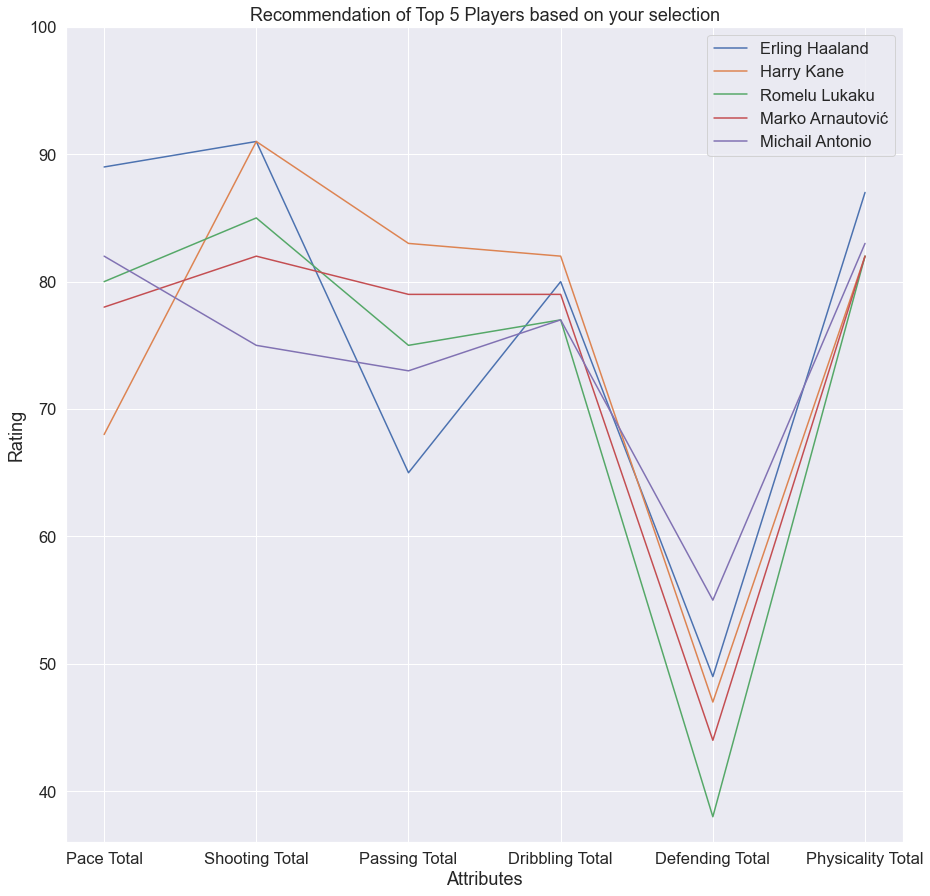

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(15,15)}, font_scale = 1.5)
#plot recommendations
if player_or_attribute == 2:

    
    # features to graph for strikers
    x_feat_list = ["Pace Total", "Shooting Total", "Passing Total", 
                   "Dribbling Total", "Defending Total", "Physicality Total"]

    denormalized_fifa['Denormalized Overall'] = denormalized_fifa.iloc[:, 21:27].mean(axis=1)
    top5 = denormalized_fifa.nlargest(5, 'Denormalized Overall')
    y = top5.loc[:, x_feat_list]

    # creating a new dataframe with the data for our 5 recommended players
    df_top5 = pd.DataFrame()

    for i in range(len(top5)):
        s_bool = df_fifa.loc[:, 'Full Name'] == top5.iloc[i]['Full Name']

        df_top5 = df_top5.append(df_fifa.loc[s_bool, user_trait])

    # graphing that data
    y = df_top5.loc[:, x_feat_list]

    y_min = []
    for i in range(len(top5)):
        plt.plot(x_feat_list, y.iloc[i], label = top5.iloc[i,0])

        # gets minimum value from each array and adds it to the list
        y_min.append(min(y.iloc[i].values))


    plt.title("Recommendation of Top 5 Players based on your selection")
    plt.legend(loc = "upper right")
    plt.xlabel('Attributes')
    plt.ylabel('Rating')
    plt.yticks(np.arange(0, 110, 10))
    plt.ylim(min(y_min)-2, 100)

    plt.show()

elif player_or_attribute == 1:

    # features to graph for strikers
    x_feat_list = ["Pace Total", "Shooting Total", "Passing Total", 
                   "Dribbling Total", "Defending Total", "Physicality Total"]

    # creating a new dataframe with the data for our 5 recommended players
    df_top5_knn = pd.DataFrame()

    for i in range(len(player_recs_new)):
        s_bool = df_fifa.loc[:, 'Full Name'] == player_recs_new[i][1]

        df_top5_knn = df_top5_knn.append(df_fifa.loc[s_bool, user_trait])

    # graphing that data
    y = df_top5_knn.loc[:, x_feat_list]

    for i in range(len(top5)):
        plt.plot(x_feat_list, y.iloc[i], label = player_recs_new[i][1])


    y_min = []
    for i in range(len(top5)):    
        # gets minimum value from each array and adds it to the list
        y_min.append(min(y.iloc[i].values))


    plt.title("Recommendation of Top 5 Players based on your selection")
    plt.legend(loc = "upper right")
    plt.xlabel('Attributes')
    plt.ylabel('Rating')
    plt.yticks(np.arange(0, 110, 10))
    plt.ylim(min(y_min)-2, 100)

    plt.show()


In [ ]:
chosen_player = input("Which player out of the recommendations would you like to chose?\n")

Which player out of the recommendations would you like to chose?
Erling Haaland


# Webscraping using selenium

In [ ]:
#!pip install selenium
#!pip install webdriver_manager

In [ ]:
from selenium import webdriver
import time
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

### You can specify by uncommented the line and change the download directory to your choice

In [ ]:
options = webdriver.ChromeOptions() 
#prefs = {"download.default_directory" : "C:\\Users\\ChenXi\\Desktop\\DS2500"}
#options.add_experimental_option("prefs",prefs)
ser = Service(ChromeDriverManager().install())

[WDM] - Downloading: 100%|██████████| 8.61M/8.61M [00:00<00:00, 17.2MB/s]


In [ ]:
CSS_SELECTOR = "css selector"
LINK_TEXT = "link text"
XPATH = "xpath"

This step is to search target player in www.futbin.com and redirect the page to that player.
Note: your browser will be closed once because www.futbin.com is protected by cloudfare, doing this can bypass their protection from bot.

In [ ]:
player = chosen_player
url = f'https://www.futbin.com/players?page=1&version=gold&search={player}&pos_type=all'

driver = webdriver.Chrome(service=ser,options=options)
driver.get(url)
time.sleep(2)

player_info = driver.find_element(By.XPATH, '/html/body/div[10]/div[2]/div[5]/div[3]/table/tbody/tr[1]/td[2]/div[2]/div[1]/a')
driver.execute_script("arguments[0].click();", player_info)

url = driver.current_url
print(url)

driver.close()

# At this step, we get the url of target player

https://www.futbin.com/23/player/26281/erling-haaland


### Instruction:
- for csv file,change i == 6
-  you can change url of driver.get(url) to url of target player website

This step is to download the most updated history price of target player. It might take some time to finish. Please wait until the broswer close itself.

In [ ]:
driver = webdriver.Chrome(service=ser,options=options)

driver.get(url)

time.sleep(3)

gotit = driver.find_element(By.XPATH, '/html/body/div[1]/div/a')
gotit.click()

container = driver.find_element(By.XPATH, '/html/body/div[10]/div[15]/div/div/div[2]/div[2]/div/div/div[1]/div[3]')
container.click()

time.sleep(3)

b = driver.find_element(By.CLASS_NAME, "highcharts-button-symbol")
b.click()

l = driver.find_elements(By.XPATH, '/html/body/div[10]/div[15]/div/div/div[2]/div[2]/div/div/div[1]/div[3]/div[1]/ul/li')

i = 0

for idx,lists in enumerate(l): 
    if i == 7:
        print(lists.text)
        driver.execute_script("arguments[0].click();", lists)
        time.sleep(1)
    i += 1

driver.close()

# we successfully download the file

Download XLS


## Make sure the downloaded file is in the same folder as this document and the name of the file is the correct (i.e., if you download it more than once), or this next part will not run. 
- if this is the second time you run, please update the file name

In [ ]:
import pandas as pd
df = pd.read_html("chart.xls")[0]
df

,DateTime,Cross,PC
0,2022-09-22 00:00:00,38021,0
1,2022-09-23 00:00:00,42532,38649
2,2022-09-24 00:00:00,46583,41436
3,2022-09-25 00:00:00,54496,48290
4,2022-09-26 00:00:00,81707,75041
...,...,...,...
71,2022-12-02 00:00:00,32580,37040
72,2022-12-03 00:00:00,28679,29418
73,2022-12-04 00:00:00,28741,28616
74,2022-12-05 00:00:00,29317,28829


In [ ]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# convert datetime column to just date
df['Date'] = pd.to_datetime(df['DateTime']).dt.date
#df['Date'] = [datetime.timestamp(dt) for dt in df['DateTime']]
df

for idx, row in df.iterrows():
    if idx == 0:
        df.drop(axis=0, index=idx, inplace=True)
        
df.index = np.arange(0, len(df))


In [ ]:
import datetime as dt
df['Date_0'] = pd.to_datetime(df['DateTime'])
df['Date_0']=df['Date_0'].map(dt.datetime.toordinal)

In [ ]:
for idx, row in df.iterrows():
    if idx == 0:
        df.drop(axis=0, index=idx, inplace=True)
        
df.index = np.arange(0, len(df))

df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace=True)

# divide the data into half
half = int(len(df)/2)
first_half = df.iloc[:half,:]
second_half = df.iloc[half:,:]

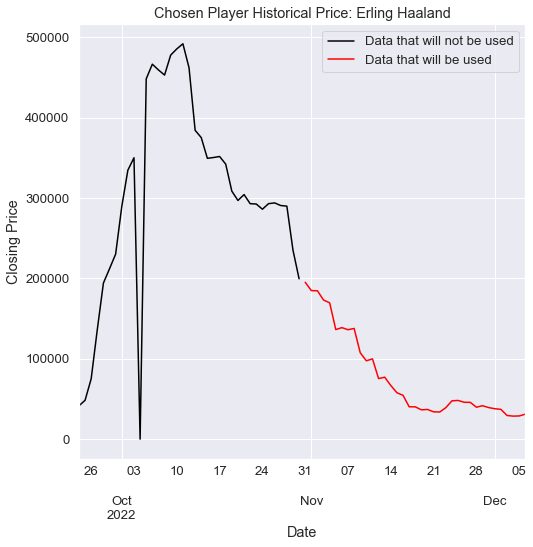

In [ ]:
plt.figure(figsize=(8, 8)) # resizing the plot
sns.set(font_scale = 1.2)
first_half['PC'].plot(color='black',label='Data that will not be used')
second_half['PC'].plot(color='red',label='Data that will be used')
plt.title('Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.title(f'Chosen Player Historical Price: {chosen_player}')
plt.legend()
plt.show()

Above are the two examples of polynomial regression we did. This polynomial regression plot consists of two things, which are the points that represent original data and a polynomial regression line that fits the data the most. The x-axis is the date that is being converted from yy/mm/dd so that as it moves to the right, the closer the date is to the present. The y-axis is the historical price of the chosen player and the unit is in coins, which is the currency in Ultimate Team mode in FIFA23. The input data is the second half of the original data because we want to focus on the recent price change. In addition, choosing a degree of 2 usually produces the highest R2 score while keeping simple. Moreover, users get recommendation of buying the player or not based on the predicted value, which we get from the polynomial regression.

# Polynomial regression

In [ ]:
def coef_to_poly_str(coef, include_zero=False):
    """ creates a str of polynomial corresponding to coef    

    Args:
        coef (np.array): coefficients of polynomial
        
    Returns:
        poly_str (str): str of polynomial
    """
    
    str_monomial_list = []
    for deg, coef in enumerate(coef):
        if coef == 0 and include_zero == False:
            # this coefficient is zero, just skip it altogether
            continue
            
        str_monomial_list.append(f'{coef:+.1f} x^{deg:d}')
        
    return 'y = ' + ' '.join(str_monomial_list)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

r2_dict = dict()

def fit_plot_ploy(x, y, degree=5):
    # x = x.reshape(-1, 1)
    poly_feat = PolynomialFeatures(degree=degree)
    x_poly = poly_feat.fit_transform(x)
    
    # initialize of kfold object
    kfold = KFold(n_splits=3,shuffle=True)

    # initiate polynomial regression
    reg_0 = LinearRegression()

    for train_idx, test_idx in kfold.split(x_poly, y):
        # split into train and test sets
        x_train = x_poly[train_idx, :]
        y_train = y[train_idx]
        x_test = x_poly[test_idx, :]
        
        reg_0.fit(x_train, y_train)
    
    # predict y (from regression)
    y_pred = reg_0.predict(x_poly)

    # plot the graph
    plt.scatter(x, y, label='observed')
    plt.plot(x, y_pred, color='r', linewidth=3, label='predicted')

    # update the r2 with paired degree
    r2_dict[degree] = r2_score(y, y_pred)

    # collect coefficients
    coef_pred = reg_0.coef_.reshape(-1)

    # getting strs of polynomial (to print)
    str_poly_pred = coef_to_poly_str(coef_pred)
    
    print(f'degree:{degree}, pred: {str_poly_pred}\nR^2={r2_score(y, y_pred):.2f}')
    print("-" * 20)

    plt.title(f'degree:{degree}\n price history of {chosen_player}')
    plt.xlabel('Date(converted)')
    plt.ylabel('Price')

    plt.legend()
    plt.gcf().set_size_inches(8, 6)


In [ ]:
x = second_half.loc[:, 'Date_0'].values

# reshape x to specify it is 1 feature and many samples
x = x.reshape(-1, 1)

y = second_half.loc[:, 'PC']

degree:0, pred: y = 
R^2=-0.00
--------------------
degree:1, pred: y = -4491.3 x^1
R^2=0.79
--------------------
degree:2, pred: y = -309595814.7 x^1 +209.6 x^2
R^2=0.96
--------------------
degree:3, pred: y = +0.0 x^1 -219.6 x^2 +0.0 x^3
R^2=0.96
--------------------
degree:4, pred: y = +0.0 x^1 -0.0 x^2 -0.0 x^3 +0.0 x^4
R^2=0.96
--------------------
degree:5, pred: y = +0.0 x^1 -0.0 x^2 -0.0 x^3 -0.0 x^4 +0.0 x^5
R^2=0.96
--------------------
degree:6, pred: y = +0.0 x^1 +0.0 x^2 -0.0 x^3 -0.0 x^4 -0.0 x^5 +0.0 x^6
R^2=0.96
--------------------
degree:7, pred: y = -0.0 x^1 -0.0 x^2 -0.0 x^3 -0.0 x^4 -0.0 x^5 -0.0 x^6 +0.0 x^7
R^2=0.96
--------------------
degree:8, pred: y = -0.0 x^1 +0.0 x^2 -0.0 x^3 -0.0 x^4 -0.0 x^5 -0.0 x^6 -0.0 x^7 +0.0 x^8
R^2=0.96
--------------------
degree:9, pred: y = -0.0 x^1 -0.0 x^2 -0.0 x^3 -0.0 x^4 -0.0 x^5 -0.0 x^6 -0.0 x^7 -0.0 x^8 +0.0 x^9
R^2=0.96
--------------------


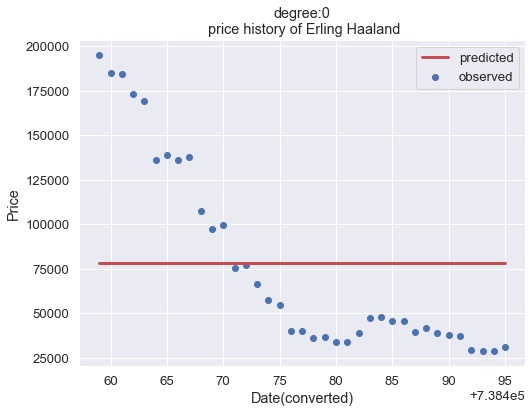

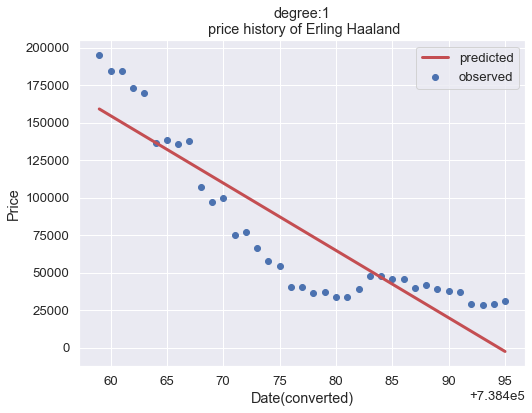

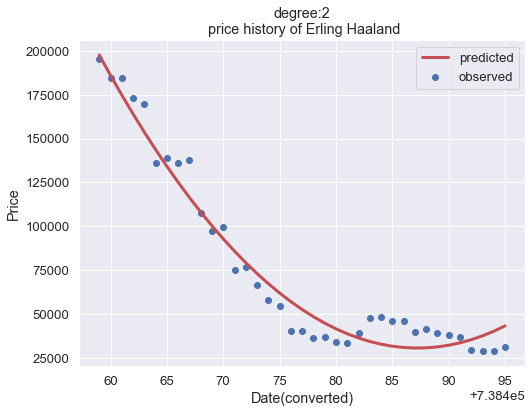

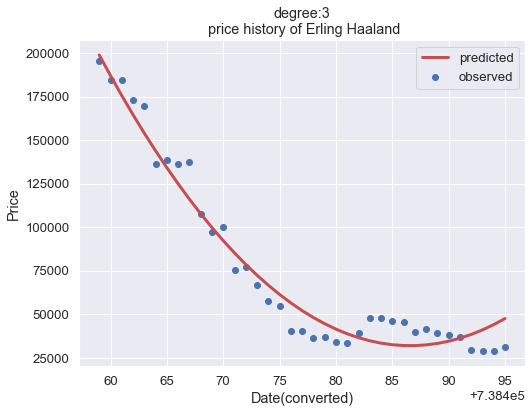

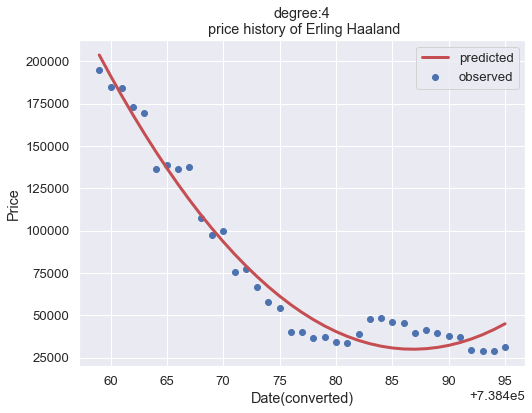

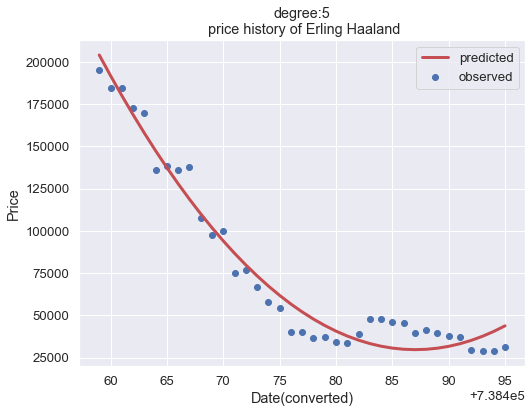

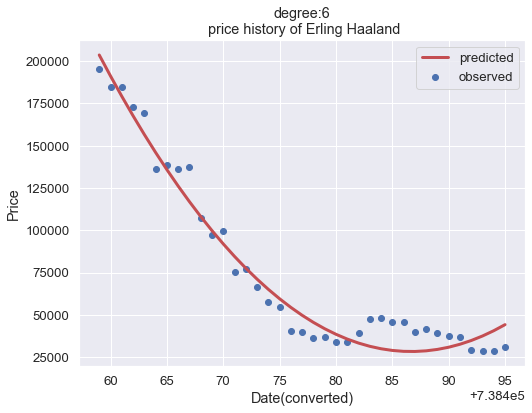

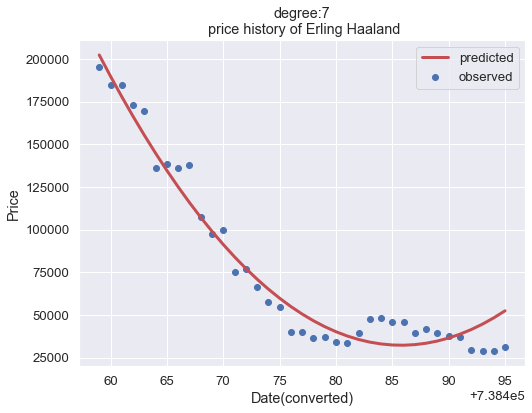

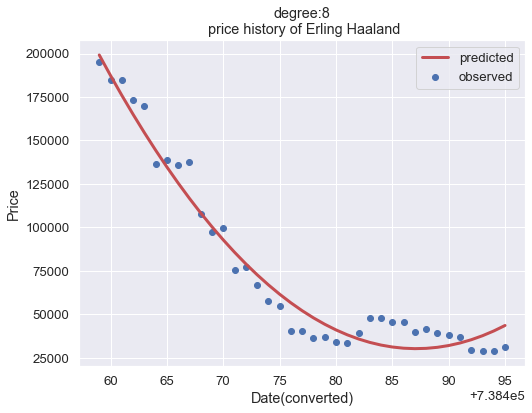

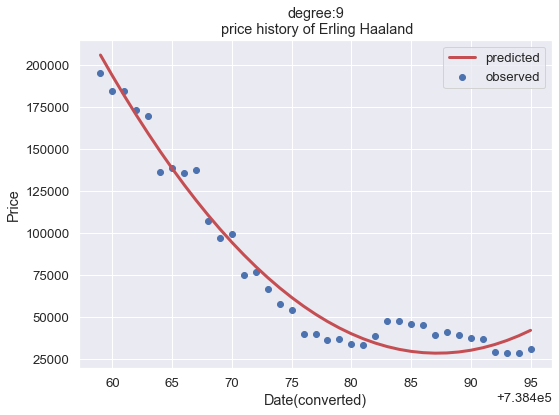

In [ ]:
# get the polynomial model from degree of 0 to 9
for i in range(10):
    plt.figure()
    fit_plot_ploy(x, y, degree=i)
    
plt.tight_layout()

degree:2, pred: y = -319232305.7 x^1 +216.1 x^2
R^2=0.96
--------------------


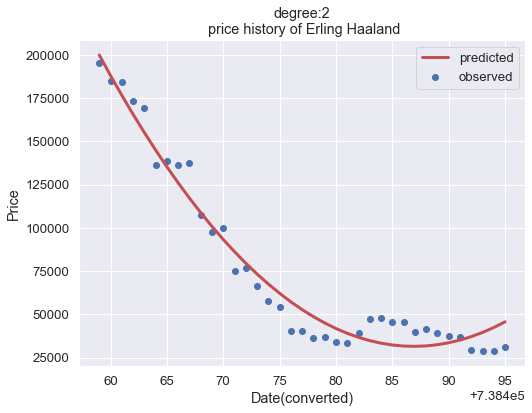

In [ ]:
fit_plot_ploy(x, y, degree=2)

This polynomial regression plot consists of two things, which are the points that represent original data and a polynomial regression line that fits the data the most. The x-axis is the date that is being converted from yy/mm/dd so that as it moves to the right, the closer the date is to the present. The y-axis is the historical price of the chosen player and the unit is in coins, which is the currency in Ultimate Team mode in FIFA23. The input data is the second half of the original data because we want to focus on the recent price change. In addition, choosing a degree of 2 usually produces the highest R2 score while keeping simple. Moreover, users get recommendation of buying the player or not based on the predicted value, which we get from the polynomial regression.

In [ ]:
# we choose the degree of 2 because it produces a high r2 score and also simple enough
poly_feat = PolynomialFeatures(degree=2)
x_poly = poly_feat.fit_transform(x)

# initiate polynomial regression
reg_0 = LinearRegression()

kfold = KFold(n_splits=3,shuffle=True)

for train_idx, test_idx in kfold.split(x_poly, y):
    # split into train and test sets
    x_train = x_poly[train_idx, :]
    y_train = y[train_idx]
    x_test = x_poly[test_idx, :]
    reg_0.fit(x_train, y_train)

p_poly = poly_feat.fit_transform(x[-1:]+1)
y_pred = reg_0.predict(p_poly)
y_pred

array([48589.5625])

In [ ]:
if y_pred > df['PC'][-1:].values[0]:
    print('The price of ',chosen_player,'will be',int(y_pred[0]),'in a week.\nWe recommend buying the player now')
else:
    print('The price of ',chosen_player,'will be',int(y_pred[0]),'in a week.\nWe recommend buying the player in a week')

The price of  Erling Haaland will be 51486 in a week.
We recommend buying the player now


# Discussion

Below is the example we will use in discussion

## Figure 6
![image](https://i.ibb.co/wp8B4C1/figure-6.png)

## Figure 7
![image](https://i.ibb.co/wJ0qrW7/figure-7.png)

## Figure 8
![image](https://i.ibb.co/X4G7TpJ/figure-8.png)

# Discussion of Player Recommendation Results (example per position group):

Attackers: 
- Attributes inputted:
- Position: Striker (ST)
- Acceleration type: Controlled
- Skill moves (stars): 4-5
- Weak foot (stars): 4-5
- Ordering of attributes: Pace, Dribbling, Shooting, Passing, Physicality and Defending

Our recommendations: 
<a href="https://ibb.co/bPswFsb"><img src="https://i.ibb.co/s2KxCKW/Screen-Shot-2022-12-06-at-11-10-20-PM.png" alt="Screen-Shot-2022-12-06-at-11-10-20-PM" border="0"></a>

The top 5 strikers overall in the dataset: 

<a href="https://ibb.co/DMyfKkm"><img src="https://i.ibb.co/jw2k4Gq/Screen-Shot-2022-12-06-at-11-11-39-PM.png" alt="Screen-Shot-2022-12-06-at-11-11-39-PM" border="0"></a>

For our recommendations, the first three are within the top five players within the whole dataset for that position. Thus it is expected and makes sense that they appear in our recommendations. The difference in order between them comes from the preferences the user stated. For example, Mbappé is first in our recommendation (vs. 2nd overall) because his pace attribute is higher than Cristiano and Lewandoski’s, and the user valued pace the most. Our last two recommendations are not within the top five. Initially it might be surprising that we would recommend these players. However, this again has to do with the way the user ranked the attributes’ importance. Lautaro Martínez has very high Pace and Dribbling scores, and so does Luis Muriel (89 and 83, respectively). To further illustrate this point, Harry Kane has a very low score for Pace (68),  and Haaland has relatively low scores for Dribbling (80), and for Passing (65), which take him out of our top five. 

Midfielders
- Attributes inputted:
- Position: Center Attacking Mid (CAM)
- Acceleration type: Controlled
- Skill moves (stars): 4-5
- Weak foot (stars): 4-5
- Ordering of attributes: Dribbling, Pace, Passing, Shooting, Physicality and Defending 

Our recommendations: 
<a href="https://ibb.co/GWswHmp"><img src="https://i.ibb.co/1rsVzcQ/Screen-Shot-2022-12-06-at-11-12-45-PM.png" alt="Screen-Shot-2022-12-06-at-11-12-45-PM" border="0"></a>

The top 5 center attacking mids overall in the dataset: 

<a href="https://ibb.co/C5yRTzJ"><img src="https://i.ibb.co/SXgF9PQ/Screen-Shot-2022-12-06-at-11-15-01-PM.png" alt="Screen-Shot-2022-12-06-at-11-15-01-PM" border="0"></a>


Our recommendations for midfielders based on the attributes above are quite different from the top five players for that position. This is mainly because we chose ‘Controlled’ as the Acceleration type. Since Messi, Sylva and Dybala are ‘Explosive’, they were not considered for our recommendations. Of the top 5 that were considered, Müller was not recommended because of his low Pace score (69), and because of his lower Dribbling score (80) than our recommendations. Our recommendations excelled in the Dribbling, Pace and Passing categories, and were all considered to have ‘Controlled’ acceleration types. 

Something that we could think about in the future is including acceleration type as a factor to be weighed with the other attributes, instead of as a filter that discards those that don’t match the acceleration type specified by the user. This way players like Messi and Silva, which are great players, would still be recommended even if they didn’t match it. 

Defenders
- Attributes inputted:
- Position: Left Back (LB)
- Acceleration type: Controlled
- Skill moves (stars): 3-5
- Weak foot (stars): 3-5
- Ordering of attributes: Defending, Physicality, Passing, Pace, Dribbling, Shooting

Our recommendations: 
<a href="https://ibb.co/xCNpNnG"><img src="https://i.ibb.co/qyvtvH9/Screen-Shot-2022-12-06-at-11-15-46-PM.png" alt="Screen-Shot-2022-12-06-at-11-15-46-PM" border="0"></a>


The top 5 left backs overall in the dataset: 
<a href="https://ibb.co/74cvgSJ"><img src="https://i.ibb.co/wsHyJdN/Screen-Shot-2022-12-06-at-11-37-12-PM.png" alt="Screen-Shot-2022-12-06-at-11-37-12-PM" border="0"></a>


In our recommendations we include 3 players that are within the top 5 of the whole dataset for their position: Acuña, Mendy and Cancelo. These are reasonable picks and are to be expected within our top 5. The differences in the order come from the weight of the attributes specified by the user. Acuña is first in our recommendations because he has a very high rating for Defending, Physicality and Passing, which the user gave the most importance to. Mendy is second because he follows Acuña in these key attributes, and really stands out in his Pace attribute. Lastly, Cancelo is third because even though he has the highest Defending score, his Physicality attribute is much lower. Of the two top players that we didn’t recommend, Jordi Alba is considered ‘Explosive’ and thus we didn’t consider him, and Andrew Robertson has 2 stars for skill moves, and we set our minimum to three, so he was discarded. Izeta and Biraghi are recommended above other left backs because they were the players with highest scores and that were Controlled, other great defenders were Explosive, such as José Peña and Alejandro García. 

# Discussion of Price Predictions

By looking at the second example (see Figure 6), we can observe that the price of Cristiano Ronaldo increased at the time when FIFA23 was released. The increase lasted for a month and started dropping until November 28, the time when the data ends. Indeed, the price history of Ronaldo follows the same trends as many other golden players in FIFA23. They all experienced a tremendous increase and dropped to a much lower level compared to the peak. There could be many reasons why this phenomenon appears. The simplest reason is that there is a high demand for buying good players so that users can have a higher advantage in PVP (player vs player) matches. The other reason could be that EA sports published many special cards which have higher attributes and overall rating than the golden players. As a result, since golden cards are replaced by those special cards, their prices also decreased. Also, We decide to divide the data into two halves, and use the second half of data as the input of polynomial regression. There are two reasons why we do this. First, the price of golden players would never go back to the beginning, which is the common trend of golden players. Second, focusing on recent price history is expected to produce a more accurate prediction on future price.


Then, we do the polynomial regression for Cristiano Ronaldo (see Figure 7). The line fits the data very well and the degree is only 2 so that it is also simple. In addition, the data is not over-fitting. 

Finally, we enter the date (grab the last date from data and plus 1) to the polynomial regression we built and predict the future price. Since the slope is large (common trend of golden players), we don’t recognize the predicted price as the price for tomorrow. Instead, we would consider the predicted price as a possible future price for the target player (Cristiano Ronaldo) in a week. The predicted value for Cristiano Ronaldo is 66788 coins (see Figure 8). Then we compare this value to the price of the last row from our input data. If the predicted price is higher than that, we would recommend the users to buy Cristiano Ronaldo now. If the predicted price is lower than that, we will recommend the users to wait a week and see if there is a better chance to buy Cristiano Ronaldo. One thing we might notice is that the last price for Cristiano Ronaldo is around 100000, but our predicted price is only 66788, which is 33212 less than that. Based on our gaming experience, this result is valid. Since it is December and also there is the FIFA World Cup going on, the price of the golden version of Cristiano Ronaldo is expected to drop. EA Sports are releasing new cards that are better than Cristiano Ronaldo so that his price could reasonably drop to 66788 or even lower.

# future development

- Don’t take into account team attributes, so some players could be better than others for a specific team, and only focus on individual abilities
- In terms of our player recommendations, we chose to focus on attributes that affect individual abilities and chose not to include attributes that have to do with teamwork and player chemistry. We chose this because individual attributes are most important, there are more of them, and they were more straightforward to implement. Taking into account teamwork attributes would’ve overcomplicated the project. Nevertheless, this means that our top five recommendations leave out some key attributes that could affect a player’s performance in our user’s Ultimate Team. 
# Things to improve
- Use price data from previous years to stabilize our data and not have it as fluctuating 
- Incorporate team attributes for players
# Next steps
- Do several player’s price predictions
- There is an important factor of price we don’t include in our final project, which is called Squad Battle Challenge (SBC), which is a part of Ultimate Team in FIFA23. The basic rule of SBC is that users trade their cards to earn special players or player packs. Sometimes there are requirements of trading. For instance,  the SBC might ask for a bronze rare player from China. This is very difficult because there are a few Chinese players that satisfy this requirement. Due to the high demand of a certain Chinese player, his price would increase a lot. If we can automate our codes (like a script) to get information about SBC, it would be very beneficial to users’ investment in certain players.
What questions might you have to answer before such an action is taken (ethical considerations, future analyses to shore up issues raised by this analysis)?
	We need to avoid using the information from Futbin in a business way. Futbin announces on their official website that no one should use data from Futbin in a commercial way. We also need to credit Futbin as the source.


